# Time Series Analytics: Electricity Bill in Cambodia (2020-2025)

This notebook demonstrates basic time series analytics concepts using monthly electricity bill data (in Khmer riels) from 2020 to 2025.

In [43]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

## Load the Electricity Bill Dataset
Read the CSV file and prepare the time series data.

In [44]:
# Load the dataset
df = pd.read_csv('electricity_bill_khr_2020_2025.csv')
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
df.set_index('Date', inplace=True)
ts = df['Bill_KHR']
df.head()

,Year,Month,Bill_KHR
Date,,,
2020-01-01,2020,1,160000
2020-02-01,2020,2,180000
2020-03-01,2020,3,240000
2020-04-01,2020,4,320000
2020-05-01,2020,5,310000


## Visualize the Time Series
Plot the monthly electricity bill over time.

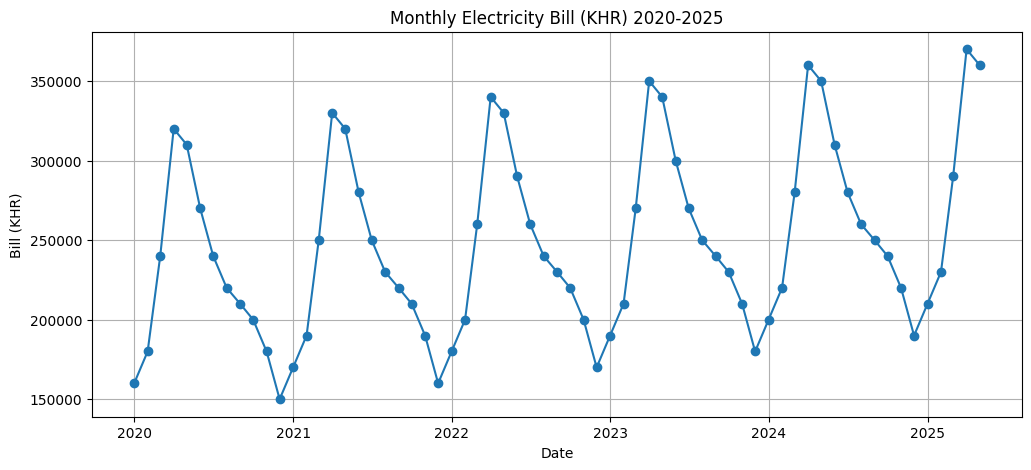

In [45]:
# Plot the time series
plt.figure(figsize=(12,5))
plt.plot(ts, marker='o')
plt.title('Monthly Electricity Bill (KHR) 2020-2025')
plt.xlabel('Date')
plt.ylabel('Bill (KHR)')
plt.grid(True)
plt.show()

## Decompose the Time Series
Decompose the series into trend, seasonality, and residuals.

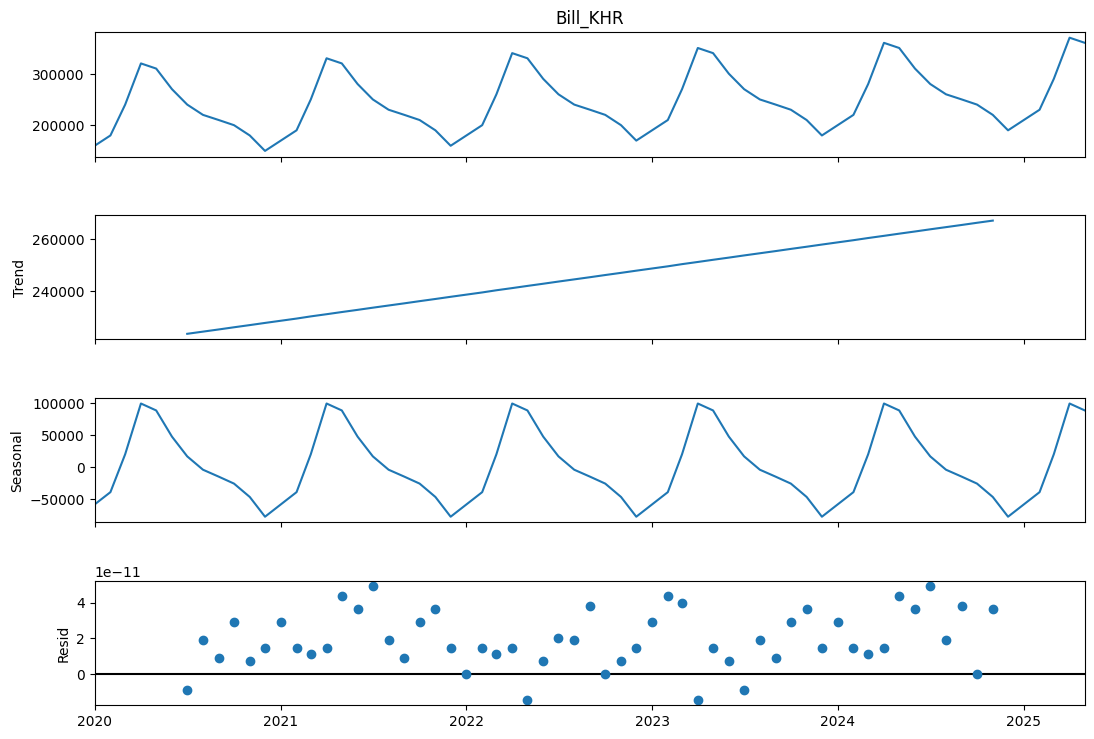

In [46]:
# Decompose the time series
decomposition = seasonal_decompose(ts, model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()

## Forecasting Techniques
Apply and compare different forecasting methods: Simple Exponential Smoothing, Holt's Linear, and Holt-Winters.

In [47]:
# Split data into train and test
train = ts[:-12]
test = ts[-12:]

# Simple Exponential Smoothing
ses = SimpleExpSmoothing(train).fit()
ses_forecast = ses.forecast(12)

# Holt's Linear Trend
holt = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
holt_forecast = holt.forecast(12)

# Holt-Winters (additive seasonality)
hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw.forecast(12)

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame({
    'Actual': test.values,
    'SES': ses_forecast.values,
    'Holt': holt_forecast.values,
    'Holt-Winters': hw_forecast.values
}, index=test.index)
forecast_df.head()

,Actual,SES,Holt,Holt-Winters
Date,,,,
2024-06-01,310000,350047.992487,351211.375153,309743.411175
2024-07-01,280000,350047.992487,352368.935748,279496.234602
2024-08-01,260000,350047.992487,353526.496343,259249.058141
2024-09-01,250000,350047.992487,354684.056938,249001.881717
2024-10-01,240000,350047.992487,355841.617534,238754.705327


## Visualize and Compare Forecasts
Plot the actual values and forecasts from each method.

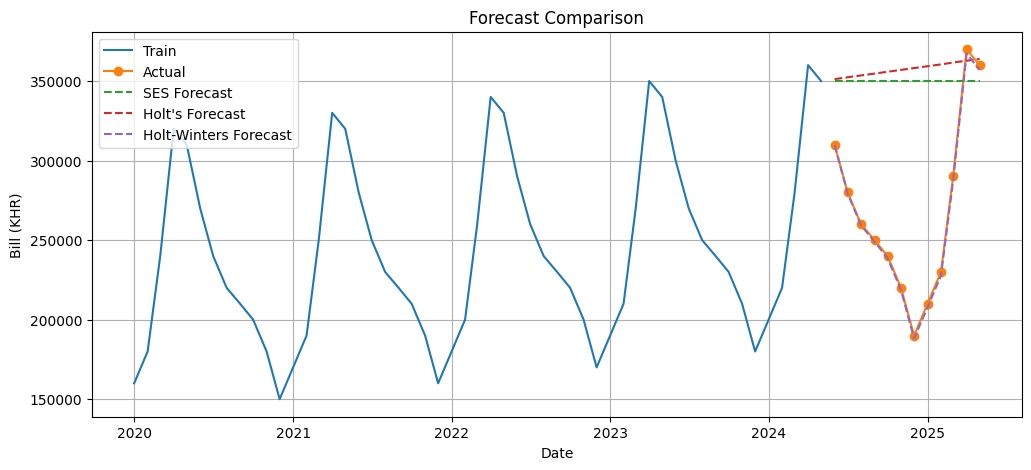

In [48]:
# Plot actual vs forecasts
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, forecast_df['SES'], label='SES Forecast', linestyle='--')
plt.plot(test.index, forecast_df['Holt'], label="Holt's Forecast", linestyle='--')
plt.plot(test.index, forecast_df['Holt-Winters'], label='Holt-Winters Forecast', linestyle='--')
plt.title('Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Bill (KHR)')
plt.legend()
plt.grid(True)
plt.show()

## Forecast Accuracy Comparison
Compare the accuracy of each forecasting method using Mean Absolute Error (MAE).

In [49]:
from sklearn.metrics import mean_absolute_error
mae_ses = mean_absolute_error(test, forecast_df['SES'])
mae_holt = mean_absolute_error(test, forecast_df['Holt'])
mae_hw = mean_absolute_error(test, forecast_df['Holt-Winters'])
print(f'MAE (SES): {mae_ses:.2f}')
print(f"MAE (Holt's): {mae_holt:.2f}")
print(f'MAE (Holt-Winters): {mae_hw:.2f}')

MAE (SES): 87531.99
MAE (Holt's): 91280.13
MAE (Holt-Winters): 1642.51
